In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import random
import numpy as np
import pandas as pd

import scipy.stats as stats


In [10]:
def read_file(file):
    return  pd.read_csv(file, parse_dates=['created_date'])

In [5]:
def get_cycle_times(df):
    cleaned = df[df['created_date'] > '2017-12-31']
    cleaned = cleaned[cleaned['cycle_time_days'] > -1]


    project_0_cycle_times = cleaned[cleaned['grp'] == 0].cycle_time_days
    project_1_cycle_times = cleaned[cleaned['grp'] == 1].cycle_time_days

    return project_0_cycle_times.values

In [17]:

def plot_cycle_time_hist(cycle_times, name='Project'):

    fig, ax = plt.subplots(figsize=(10, 5))
    fig.suptitle('Histogram Cycle Times (Days)', fontsize=14, fontweight='bold')
    plt.hist(cycle_times, label=name)
    ax.set_xlabel('Cycle Times')
    ax.set_ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

In [24]:
def plot_cycle_times_boxplot(cycle_times, name='Project'):
    fig, ax = plt.subplots(figsize=(10, 5))
    fig.suptitle('Boxplot Cycle Times (Day)', fontsize=14, fontweight='bold')

    plt.boxplot(cycle_times)

    ax.set_xticklabels(name)
    ax.set_ylabel('Cycle Times')


    plt.show()

In [45]:
def print_summary_stats(cycle_times):
   
    print('Number of observations:', stats.describe(cycle_times).nobs)
    print('Coefficient of variation:', stats.variation(cycle_times))

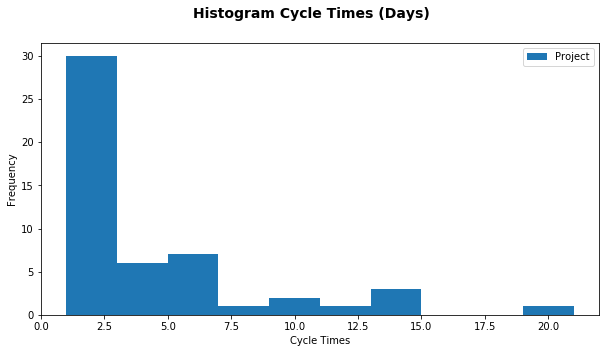

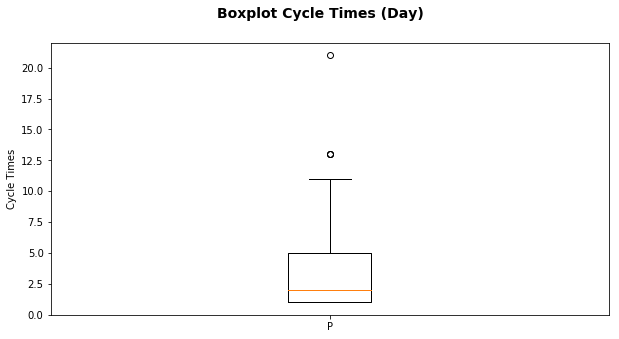

Number of observations: 51
Coefficient of variation: 1.13140945001


In [46]:
df = read_file('data.csv')
cycle_times = get_cycle_times(df)
plot_cycle_time_hist(cycle_times)
plot_cycle_times_boxplot(cycle_times)
print_summary_stats(cycle_times)

In [ ]:
print(stats.describe(project_0_cycle_times))
print(stats.describe(project_1_cycle_times))

In [ ]:
print(stats.variation(project_0_cycle_times))
print(stats.variation(project_1_cycle_times))

In [ ]:
def simulate(max_work_items, cycle_times, selector, itearions):
    out = []
    
    for i in range(itearions):
        out.append(run_iteration(max_work_items, cycle_times, selector))
        
    return np.transpose(out)

def run_iteration(max_work_items, cycle_times, selector):
    total = [0]
    for i, e in enumerate(range(max_work_items)):
            total.append(selector(cycle_times))
    return total 

def cumulative_sum_row_wise(a):
    return np.cumsum(a, 0)



In [ ]:
max_work_items = 10
iterations = 100

In [ ]:
range_work_items = np.array([x for x in range(max_work_items + 1)])
range_work_items

In [ ]:
s = simulate(max_work_items, project_0_cycle_times, np.random.choice, iterations)
s

In [ ]:
c = cumulative_sum_row_wise(s)
c

In [ ]:
v_max = cumulative_sum_row_wise([max(project_0_cycle_times) for i in range(max_work_items)])
v_max = np.insert(v_max, 0, 0)
v_max

In [ ]:
v_min = cumulative_sum_row_wise([min(project_0_cycle_times) for i in range(max_work_items)])
v_min = np.insert(v_min, 0, 0)
v_min

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))


fig.suptitle('Forecast with Min / Max', fontsize=14, fontweight='bold')

plt.plot(c, range_work_items, color='silver', linestyle='dashed', linewidth=1)
plt.plot(v_max, range_work_items, color='purple', linestyle='solid', linewidth=1)
plt.plot(v_min, range_work_items, color='purple', linestyle='solid', linewidth=1)


ax.set_xlabel("Days")
ax.set_ylabel("Work Items")


plt.show()


In [ ]:

fig, ax = plt.subplots()

fig.suptitle('Distribution of Simulated Durations (Days)', fontsize=14, fontweight='bold')

n, x, _ = plt.hist(c[-1], normed=True)

density = stats.gaussian_kde(c[-1])
plt.plot(x, density(x), color="red", linewidth=2)

ax.set_xlabel('Days')
ax.set_ylabel('Probability density')

p = [85, 90]
q = np.percentile(c[-1], p)

cm = plt.cm.get_cmap('Dark2')

for i, v in enumerate(q):
    plt.axvline(v, color=cm.colors[i], linestyle='dashed', linewidth=2, label=str(p[i]) + '%')

plt.legend(loc='upper right')
plt.show()

In [ ]:

f, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.hist(c[-1])

ax2.boxplot(c[-1], vert=False)
plt.show()

In [ ]:
p85 = []
day = 10
for i in range(len(c)):
    p85.append(stats.percentileofscore(c[i], day))

In [ ]:
p85

In [ ]:
stats.scoreatpercentile(c[2], 85)

In [ ]:
c[2]

In [ ]:
plt.plot(stats.scoreatpercentile(c[2], range(101)), range(101))
plt.show()

In [ ]:
stats.scoreatpercentile(c[2], 50)